In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

In [2]:
df = pd.read_csv("C:\Datasets\parkinson\parkinsons.csv")

In [3]:
df.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [4]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [5]:
df.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  ...  Shimmer:DDA         NHR         HNR      status  \
count        195.000000  ...   195.000000  195.000000  195.000000  195.000000   
mean           0.282251  ...     0.046993    0.024847   21.885974    0.753846   
std            0.194877  ...     0.030459    0.040418    4.425764    0.431878   
min            0.085000  ...     0.013640    0.000650    8.441000    0.000000   
25%            0.148500  ...     0.024735    0.005925   19.198000    1.000000   
50%            0.221000  ...     0.038360    0.011660   22.085000    1.000000   
75%            0.350000  ...     0.060795    0.025640   25.075500    1.000000   
max            1.302000  ...     0.169420    0.314820   33.047000    1.000000   

             RPDE         DFA     spread1     spread2          D2         PPE  
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.498536    0.718099   -5.684397    0.226510    2.381826    0.206552  
std      0.103942    0.055336    1.090208    0.083406    0.382799    0.090119  
min      0.256570    0.574282   -7.964984    0.006274    1.423287    0.044539  
25%      0.421306    0.674758   -6.450096    0.174351    2.099125    0.137451  
50%      0.495954    0.722254   -5.720868    0.218885    2.361532    0.194052  
75%      0.587562    0.761881   -5.046192    0.279234    2.636456    0.252980  
max      0.685151    0.825288   -2.434031    0.450493    3.671155    0.527367  

[8 rows x 23 columns]

In [6]:
df.shape

(195, 24)

In [7]:
df['status'] = df['status'].replace(to_replace='1',value='Parkinsons')
df['status'] = df['status'].replace(to_replace='0',value='No_Parkinsons')

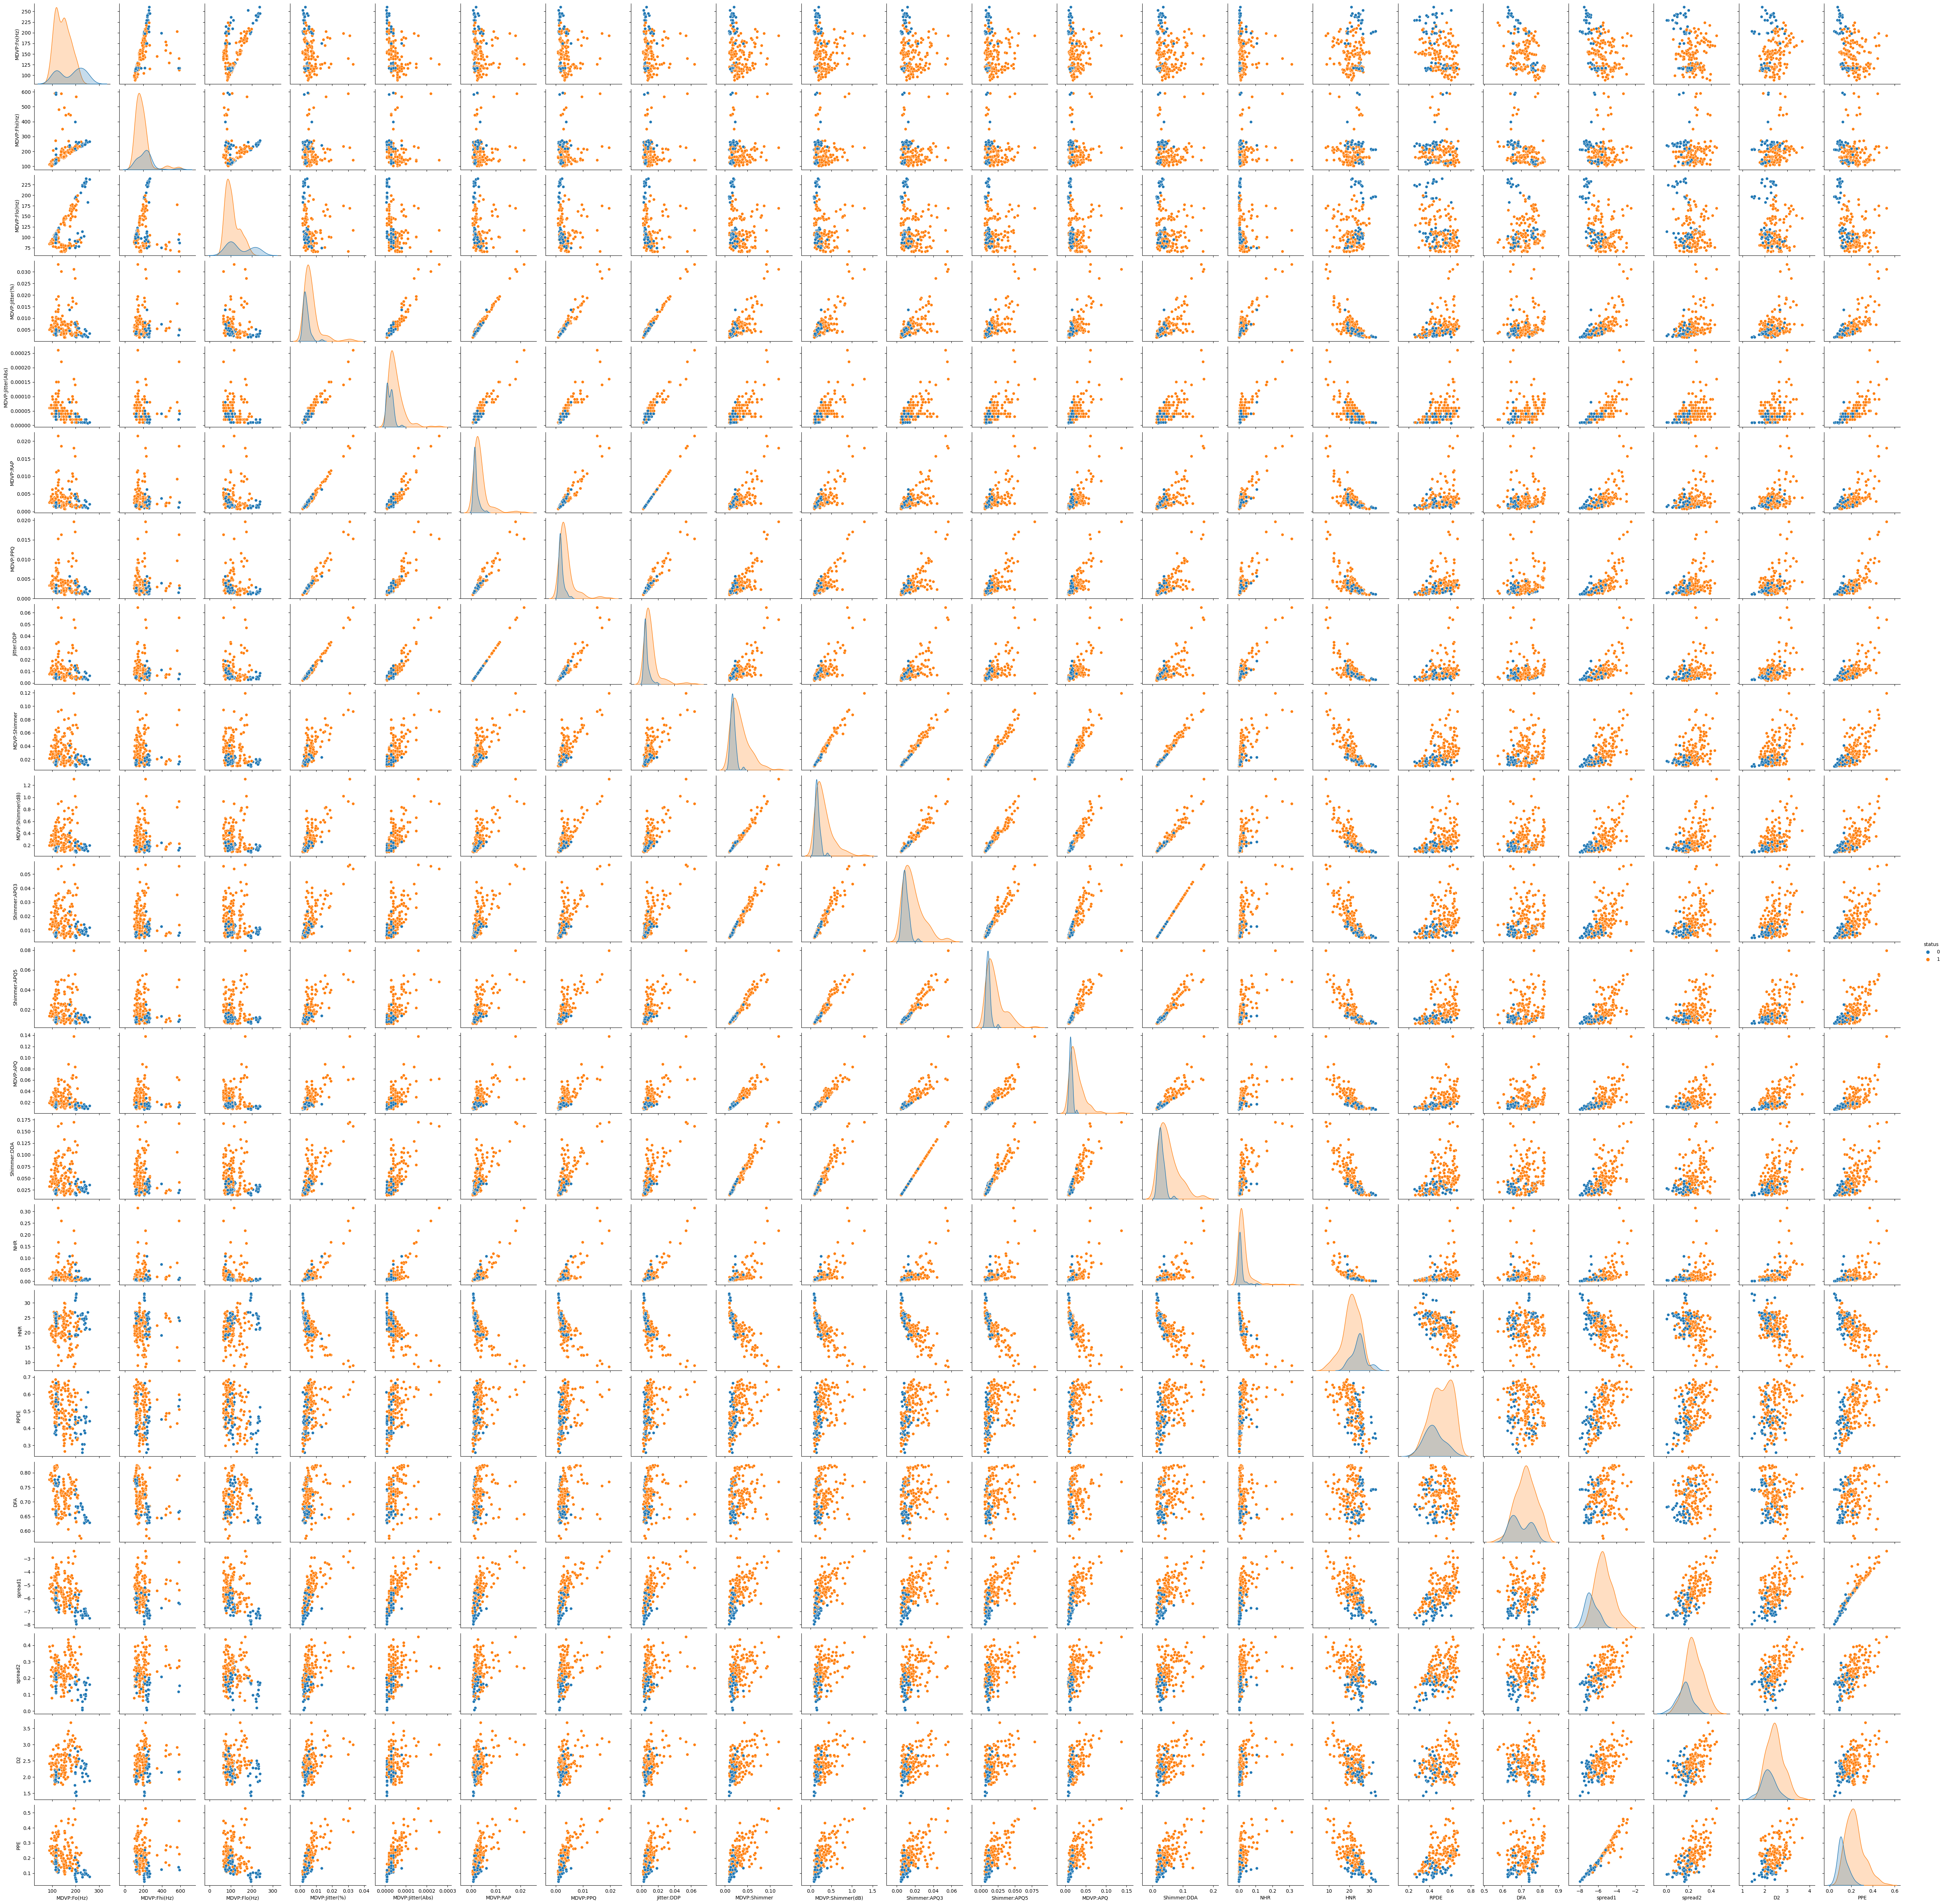

In [8]:
sns.pairplot(df,hue='status')

In [9]:
df.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [10]:
correlation = df.corr()
correlation

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Fo(Hz)          1.000000      0.400985      0.596546       -0.118003   
MDVP:Fhi(Hz)         0.400985      1.000000      0.084951        0.102086   
MDVP:Flo(Hz)         0.596546      0.084951      1.000000       -0.139919   
MDVP:Jitter(%)      -0.118003      0.102086     -0.139919        1.000000   
MDVP:Jitter(Abs)    -0.382027     -0.029198     -0.277815        0.935714   
MDVP:RAP            -0.076194      0.097177     -0.100519        0.990276   
MDVP:PPQ            -0.112165      0.091126     -0.095828        0.974256   
Jitter:DDP          -0.076213      0.097150     -0.100488        0.990276   
MDVP:Shimmer        -0.098374      0.002281     -0.144543        0.769063   
MDVP:Shimmer(dB)    -0.073742      0.043465     -0.119089        0.804289   
Shimmer:APQ3        -0.094717     -0.003743     -0.150747        0.746625   
Shimmer:APQ5        -0.070682     -0.009997     -0.101095        0.725561   
MDVP:APQ            -0.077774      0.004937     -0.107293        0.758255   
Shimmer:DDA         -0.094732     -0.003733     -0.150737        0.746635   
NHR                 -0.021981      0.163766     -0.108670        0.906959   
HNR                  0.059144     -0.024893      0.210851       -0.728165   
status              -0.383535     -0.166136     -0.380200        0.278220   
RPDE                -0.383894     -0.112404     -0.400143        0.360673   
DFA                 -0.446013     -0.343097     -0.050406        0.098572   
spread1             -0.413738     -0.076658     -0.394857        0.693577   
spread2             -0.249450     -0.002954     -0.243829        0.385123   
D2                   0.177980      0.176323     -0.100629        0.433434   
PPE                 -0.372356     -0.069543     -0.340071        0.721543   

                  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  \
MDVP:Fo(Hz)              -0.382027 -0.076194 -0.112165   -0.076213   
MDVP:Fhi(Hz)             -0.029198  0.097177  0.091126    0.097150   
MDVP:Flo(Hz)             -0.277815 -0.100519 -0.095828   -0.100488   
MDVP:Jitter(%)            0.935714  0.990276  0.974256    0.990276   
MDVP:Jitter(Abs)          1.000000  0.922911  0.897778    0.922913   
MDVP:RAP                  0.922911  1.000000  0.957317    1.000000   
MDVP:PPQ                  0.897778  0.957317  1.000000    0.957319   
Jitter:DDP                0.922913  1.000000  0.957319    1.000000   
MDVP:Shimmer              0.703322  0.759581  0.797826    0.759555   
MDVP:Shimmer(dB)          0.716601  0.790652  0.839239    0.790621   
Shimmer:APQ3              0.697153  0.744912  0.763580    0.744894   
Shimmer:APQ5              0.648961  0.709927  0.786780    0.709907   
MDVP:APQ                  0.648793  0.737455  0.804139    0.737439   
Shimmer:DDA               0.697170  0.744919  0.763592    0.744901   
NHR                       0.834972  0.919521  0.844604    0.919548   
HNR                      -0.656810 -0.721543 -0.731510   -0.721494   
status                    0.338653  0.266668  0.288698    0.266646   
RPDE                      0.441839  0.342140  0.333274    0.342079   
DFA                       0.175036  0.064083  0.196301    0.064026   
spread1                   0.735779  0.648328  0.716489    0.648328   
spread2                   0.388543  0.324407  0.407605    0.324377   
D2                        0.310694  0.426605  0.412524    0.426556   
PPE                       0.748162  0.670999  0.769647    0.671005   

                  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  Shimmer:DDA       NHR  \
MDVP:Fo(Hz)          -0.098374         -0.073742  ...    -0.094732 -0.021981   
MDVP:Fhi(Hz)          0.002281          0.043465  ...    -0.003733  0.163766   
MDVP:Flo(Hz)         -0.144543         -0.119089  ...    -0.150737 -0.108670   
MDVP:Jitter(%)        0.769063          0.804289  ...     0.746635  0.906959   
MDVP:Jitter(Abs)      0.703322          0.716601  ...     0.697170  0.834972   
MDVP:RAP

In [12]:
neg_corr = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','HNR']

In [13]:
sns.heatmap(correlation)

<AxesSubplot:>

In [14]:
sns.countplot(x='status',data=df)

<AxesSubplot:xlabel='status', ylabel='count'>

In [20]:
X = df.drop(['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','HNR','status','name'],axis=1)
y = df['status']

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 101)

In [25]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
log_predictions = log_model.predict(X_test)
plt.scatter(y_test,log_predictions)

In [26]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_predictions = rfc.predict(X_test)
plt.scatter(y_test,rfc_predictions)

In [28]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_predictions = rfr.predict(X_test)
plt.scatter(y_test,rfr_predictions)

In [32]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,classification_report
print(f"For LogisticRegression :{mean_squared_error(y_test,log_predictions)}")
print(f"For Random Forest Classifier :{mean_squared_error(y_test,rfc_predictions)}")
print(f"For random forest regressor :{mean_squared_error(y_test,rfr_predictions)}")
print(f"For LogisticRegression :{mean_absolute_error(y_test,log_predictions)}")
print(f"For Randon f Classifier :{mean_absolute_error(y_test,rfc_predictions)}")
print(f"For random forest regressor: {mean_absolute_error(y_test,rfr_predictions)}")
#BEST algorithm is the Random Forest Classifier 

For LogisticRegression :0.1282051282051282
For Random Forest Classifier :0.1282051282051282
For random forest regressor :0.07532564102564103
For LogisticRegression :0.1282051282051282
For Randon f Classifier :0.1282051282051282
For random forest regressor: 0.16846153846153847


In [30]:
print(classification_report(y_test,rfc_predictions))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.93      0.89      0.91        28

    accuracy                           0.87        39
   macro avg       0.84      0.86      0.85        39
weighted avg       0.88      0.87      0.87        39



# FINIR